# Travel Insurance Prediction

#### import reliable libraries / modules

In [178]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import os
import csv
import sys

from collections import defaultdict, Counter

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('darkgrid')

%matplotlib inline

#### Load dataset from local host machine

In [134]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Data Camp - Case Study Project - Travel Insurance\travel_insurance.csv")
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


#### Statistical representation of Dataset 

In [135]:
df.shape

(1987, 9)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   EmploymentType       1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [137]:
round(df.describe(), 2)

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.00,1987.00,1987.00,1987.00,1987.00
mean,29.65,932762.96,4.75,0.28,0.36
std,2.91,376855.68,1.61,0.45,0.48
min,25.00,300000.00,2.00,0.00,0.00
25%,28.00,600000.00,4.00,0.00,0.00
50%,29.00,900000.00,5.00,0.00,0.00
75%,32.00,1250000.00,6.00,1.00,1.00
max,35.00,1800000.00,9.00,1.00,1.00


In [138]:
df.isnull().sum()

Age                    0
EmploymentType         0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

#### Graphical statistic information

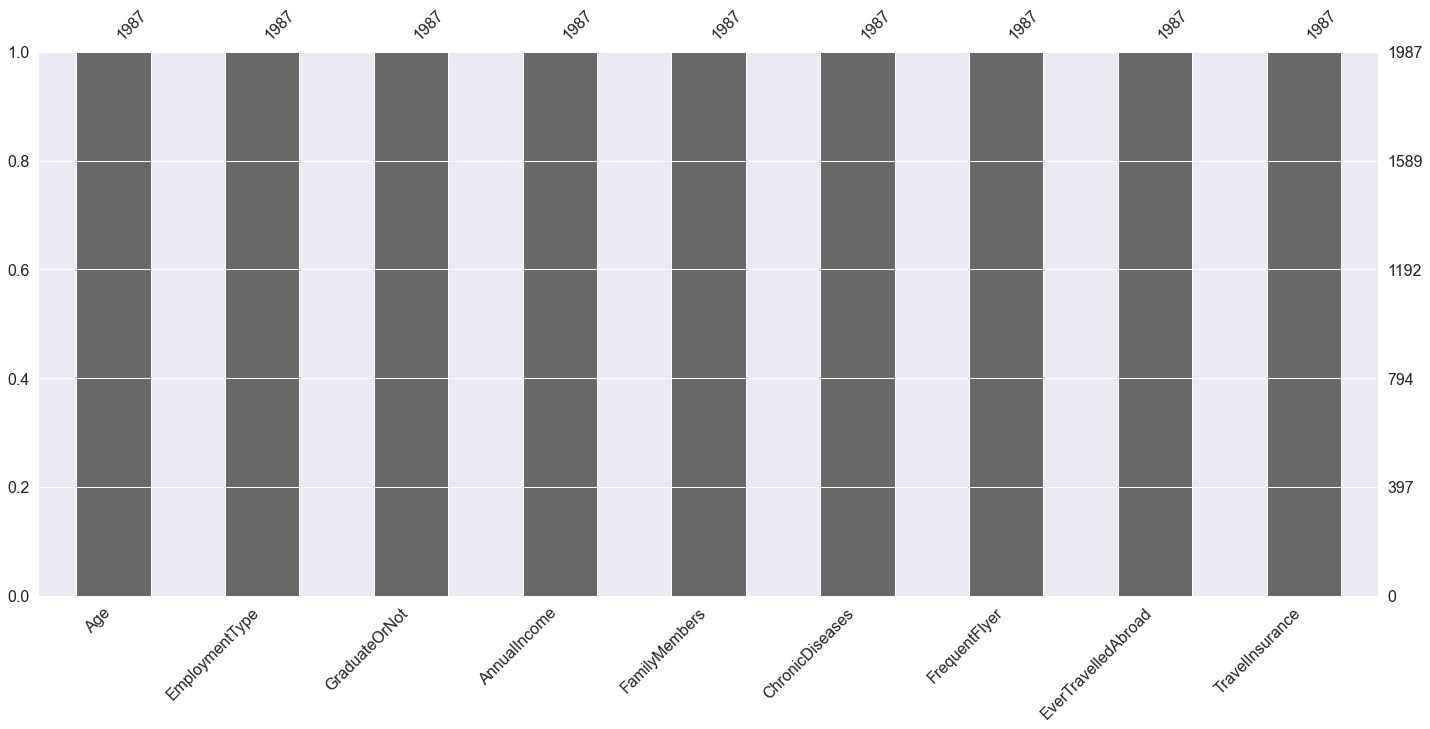

In [139]:
msno.bar(df)

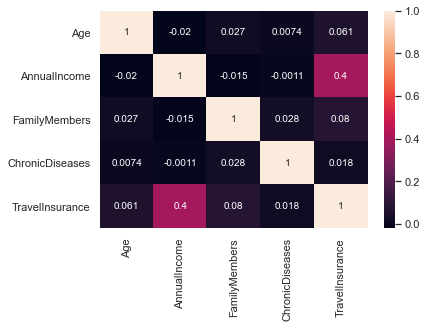

In [140]:
#plt.figure(figsize = (10,8))
sb.heatmap(df.corr(), annot = True)

In [141]:
#sb.distplot([x for x in df.columns if df[x].dtypes != int])

#### Exploratory Data Analysis

In [142]:
df.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


#### One Hot Enoding

In [143]:
le = LabelEncoder()

In [149]:
#df[['EmploymentType', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']] = le.fit_transform(df[['EmploymentType', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']])
df['EmploymentType'] = le.fit_transform(df['EmploymentType'])
df['GraduateOrNot'] = le.fit_transform(df['GraduateOrNot'])
df['FrequentFlyer'] = le.fit_transform(df['FrequentFlyer'])
df['EverTravelledAbroad'] = le.fit_transform(df['EverTravelledAbroad'])
df.head(2)

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0


In [150]:
df.isnull().sum().sum()

0

#### Train the dataset for machine learning

In [166]:
x = df.drop(columns = ['TravelInsurance'])
y = df['TravelInsurance']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


#### Model Instance

In [194]:
dtc = DecisionTreeClassifier() # instance of a model

dtc.fit(x, y)

DecisionTreeClassifier()

In [217]:
dtc_pred = dtc.predict(x_train)
dtc_travel = pd.DataFrame({'prediction':dtc_pred})
dtc_travel.head()
dtc_travel['prediction'].value_counts()

0    1134
1     455
Name: prediction, dtype: int64

In [220]:
str(round(accuracy_score(dtc_pred, y_train) * 100, 2)) + '%'

'91.57%'

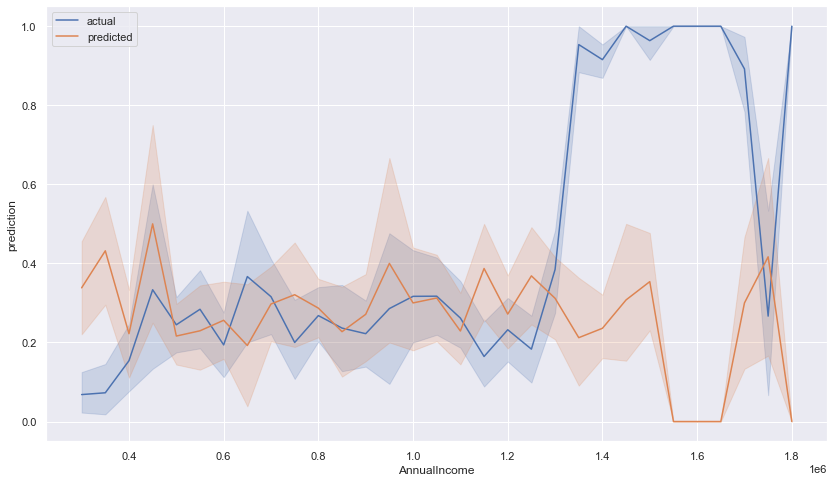

In [207]:
plt.figure(figsize = (14, 8))
sb.lineplot(df['AnnualIncome'], y = df['TravelInsurance'], label = 'actual')
sb.lineplot(df['AnnualIncome'], y = dtc_travel['prediction'], label = 'predicted')

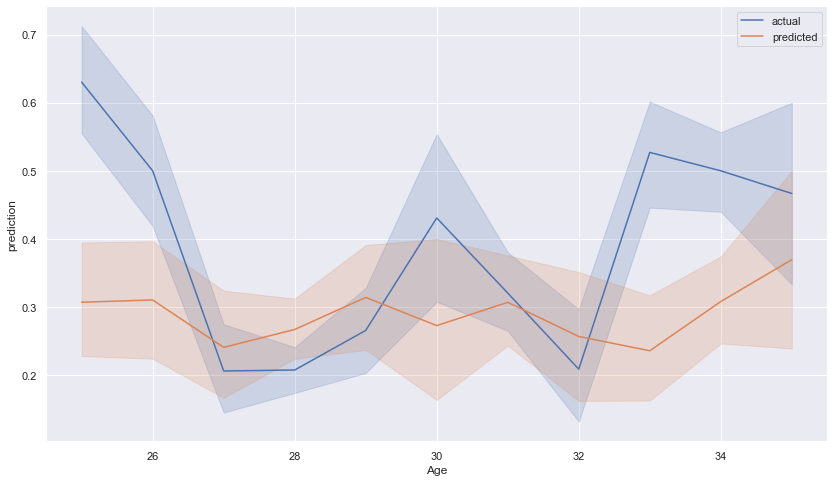

In [208]:
plt.figure(figsize = (14, 8))
sb.lineplot(df['Age'], y = df['TravelInsurance'], label = 'actual')
sb.lineplot(df['Age'], y = dtc_travel['prediction'], label = 'predicted')

#### Random Forest Classifier 

In [199]:
rfc = RandomForestClassifier()

rfc.fit(x, y)

RandomForestClassifier()

In [204]:
rfc_pred = rfc.predict(x_train)
rfc_travel = pd.DataFrame({'prediction':rfc_pred})
rfc_travel.head()
rfc_travel['prediction'].value_counts()

0    1096
1     493
Name: prediction, dtype: int64

In [219]:
str(round(accuracy_score(rfc_pred, y_train) * 100, 2)) + '%'

'91.69%'

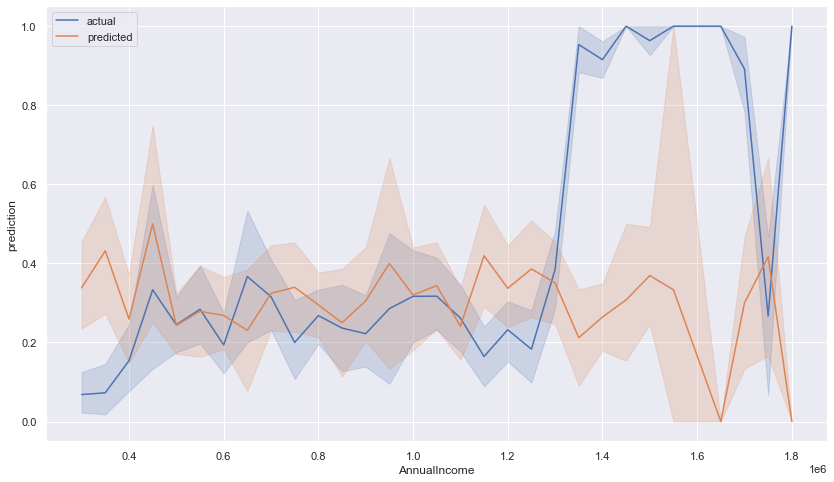

In [221]:
plt.figure(figsize = (14, 8))
sb.lineplot(df['AnnualIncome'], y = df['TravelInsurance'], label = 'actual')
sb.lineplot(df['AnnualIncome'], y = rfc_travel['prediction'], label = 'predicted')

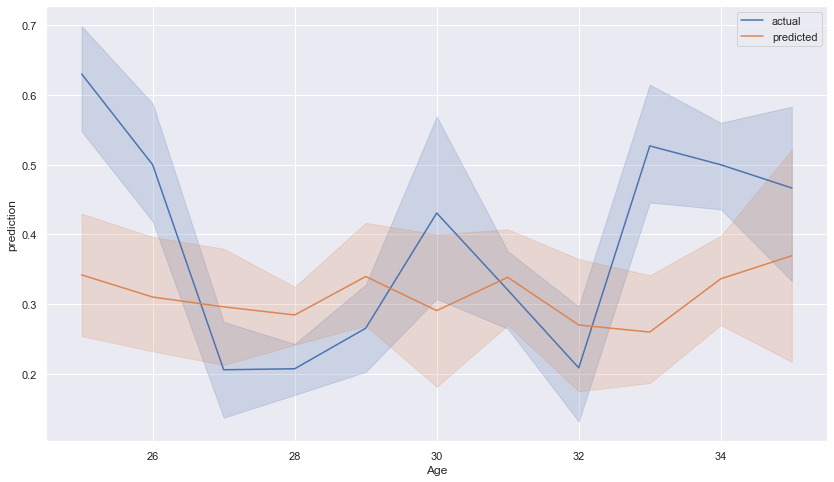

In [222]:
plt.figure(figsize = (14, 8))
sb.lineplot(df['Age'], y = df['TravelInsurance'], label = 'actual')
sb.lineplot(df['Age'], y = rfc_travel['prediction'], label = 'predicted')